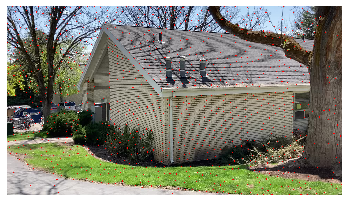

In [1]:
# Importing the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading the image and converting into B?W
image = cv2.imread("Data/20230501_205454000_iOS/output_0001.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Applying the function
corners = cv2.goodFeaturesToTrack(
    gray_image, maxCorners=2048, qualityLevel=0.02, minDistance=32)
corners = np.float32(corners)
  
for item in corners:
    x, y = item[0]
    x = int(x)
    y = int(y)
    cv2.circle(image, (x, y), 3, (0, 0, 255), -1)

RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Showing the image
plt.imshow(RGB_img)
plt.axis('off')
plt.show()

# cv2.imshow('good_features', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

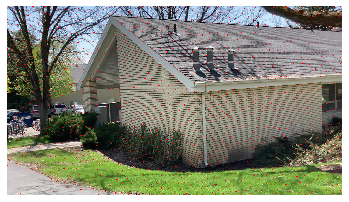

In [2]:
# Importing the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading the image and converting into B?W
image = cv2.imread("Data/20230501_205454000_iOS/output_0162.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Applying the function
corners = cv2.goodFeaturesToTrack(
    gray_image, maxCorners=2048, qualityLevel=0.02, minDistance=32)
corners = np.float32(corners)
  
for item in corners:
    x, y = item[0]
    x = int(x)
    y = int(y)
    cv2.circle(image, (x, y), 3, (0, 0, 255), -1)

RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Showing the image
plt.imshow(RGB_img)
plt.axis('off')
plt.show()

cv2.imshow('good_features', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

https://www.youtube.com/watch?v=RtsCs_VfszE

https://www.youtube.com/watch?v=Ilv6FYVZuVQ

https://www.youtube.com/watch?v=E1DMomAlDJo

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# feature_params = dict(maxCorners=4096, qualityLevel=0.02, minDistance=32, blockSize=9)
# lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.02))


# image_0 = cv2.imread("Data/20230501_205454000_iOS/output_0001.jpg")
# image_1 = cv2.imread("Data/20230501_205454000_iOS/output_0002.jpg")
# image_2 = cv2.imread("Data/20230501_205454000_iOS/output_0003.jpg")
# image_0_gray = cv2.cvtColor(image_0, cv2.COLOR_BGR2GRAY)
# image_1_gray = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
# image_2_gray = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

# # find corners in first frame
# corners_0 = cv2.goodFeaturesToTrack(image_0_gray, **feature_params)
# # print(corners_0.shape[0])
# # print(corners_0[0])
# # calculate optical flow
# p1, status, err = cv2.calcOpticalFlowPyrLK(image_0_gray, image_1_gray, corners_0, None, **lk_params)
# # print(p1.shape)
# # find homography
# H_matrix, mask = cv2.findHomography(corners_0, p1, cv2.RANSAC, 5.0) 
# matchesMask = mask.ravel().tolist()


# # Select only the points for which the flow was found
# good_new = corners_0[status == 1]
# good_old = p1[status == 1]

# # Draw the points on the new frame
# for i, (new, old) in enumerate(zip(good_new, good_old)):
#     a, b = new.ravel()
#     c, d = old.ravel()
#     out_frame = cv2.circle(image_1, (a,b), 5, (0,255,0), -1)

# cv2.imshow('Frame', out_frame)
# cv2.waitKey(0)

# #
# p0r, _, _ = cv2.calcOpticalFlowPyrLK(image_1_gray, image_0_gray, p1, None, **lk_params)

# d = abs(p1-p0r).reshape(-1, 2).max(-1)

# good = d < 1


# # find corners in second frame
# new_corners_1 = []






# # apply mask and homography
# cv2.destroyAllWindows()


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

green = (0, 255, 0)
red = (0, 0, 255)

# feature_params = dict(maxCorners=4096, qualityLevel=0.04, minDistance=32, blockSize=5)
# feature_params = dict(maxCorners=4096, qualityLevel=0.06, minDistance=9, blockSize=9)
feature_params = dict(maxCorners=0, qualityLevel=0.06, minDistance=8, blockSize=19)

lk_params = dict(winSize=(19, 19), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Load the images
old_frame = cv2.imread('Data/20230501_205454000_iOS/output_0001.jpg')
# old_frame = cv2.resize(old_frame, None, fx=0.5, fy=0.5)
new_frame = cv2.imread('Data/20230501_205454000_iOS/output_0010.jpg')
# new_frame = cv2.resize(new_frame, None, fx=0.5, fy=0.5)
new_con_img = new_frame.copy()

# Convert to grayscale
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
new_gray = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)

# Find good features to track
old_points = cv2.goodFeaturesToTrack(old_gray, **feature_params)
# good = d < 1

# Calculate optical flow
new_points, status, err = cv2.calcOpticalFlowPyrLK(old_gray, new_gray, old_points, None, **lk_params)
print('status', status.shape)

p0r, _, _ = cv2.calcOpticalFlowPyrLK(new_gray, old_gray, new_points, None, **lk_params)
d = abs(old_points-p0r).reshape(-1,2).max(-1)
good = d < 1
good = good.reshape(-1,1)
print('good.shape', good.shape)
print((status==good).all())
# print('good', good.reshape(-1,1).shape)
# print(good.ravel().tolist())
# print(status)
# Select only the points for which the flow was found
# good_new = new_points[status == 1]
# good_old = old_points[status == 1]
good_new = new_points[good == 1]
print(new_points.shape)
print(good_new.shape)
good_old = old_points[good == 1]

# Draw the points on the new frame
for i, (new, old) in enumerate(zip(good_new, good_old)):
    a, b = new.ravel()
    c, d = old.ravel()
    new_con_img = cv2.line(new_frame, (int(a), int(b)), (int(c), int(d)), (255,0,0), 1)
    new_con_img = cv2.circle(new_frame, (int(a), int(b)), 0, (0, 255, 255), 3)

# print(good_new.shape)
# print(good_old.shape)
# cv2.imshow('Frame', new_con_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# find homography
H_matrix, mask = cv2.findHomography(good_old, good_new, cv2.USAC_MAGSAC, 
                                ransacReprojThreshold = 1.0, maxIters = 5000, confidence = 0.999999)
# print(mask)
# print(mask.ravel().tolist())
# matchesMask = mask.ravel().tolist()
# matchesMask = mask.ravel()
# H_good = mask[:,0]
# print(H_good)
# print(len(matchesMask))
# Count the number of 1s in the mask
# num_ones = matchesMask.sum()
# Print the result
# print(num_ones)

# Plot only the points for which the mask is True
# for point in good_new[matchesMask.astype(bool)]:
#     # print(point)
#     x, y = point
#     # print(x, y)
#     img = cv2.circle(new_frame, (int(x), int(y)), 5, (0,255,0), 1)

for point, H_good in zip(good_new, mask[:,0]):
    # print(point)
    x, y = point
    # print(x, y)
    img = cv2.circle(new_frame, (int(x), int(y)), 5, (red, green)[H_good], 1)
    # img = cv2.circle(new_frame, (int(x), int(y)), 5, (0,255,0), 1)

# Showing the image
# RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.figure(figsize=(20,20))
# plt.imshow(RGB_img)
# plt.axis('off')
# plt.show()

cv2.imshow('Image', img)
cv2.waitKey(0)


cv2.destroyAllWindows()

status (5236, 1)
good.shape (5236, 1)
False
(5236, 1, 2)
(5111, 2)


In [ ]:
# Define the points and the mask
points = np.array([[10, 20], [30, 40], [50, 60], [70, 80]])
mask = np.array([True, False, True, False])

# Plot only the points for which the mask is True
for point in points[mask]:
    x, y = point
    print(x, y)

10 20
50 60


In [3]:
import numpy as np
import cv2 as cv
import math
cap = cv.VideoCapture('Data\Videos\wymont.MOV')
# cap = cv.VideoCapture('Data\Videos\Aerial View of the Great Pyramid of Giza.mp4')
# cap = cv.VideoCapture('Data\Videos\Blocks.MOV')
# cap = cv.VideoCapture('Data\Videos\Pyramids with a Drone 4K.mp4')
# cap = cv.VideoCapture('Data\Videos\/20230502_184032000_iOS.MOV')
#角点检测参数
# feature_params = dict(maxCorners=128, qualityLevel=0.1, minDistance=7, blockSize=7)
feature_params = dict(maxCorners=4, qualityLevel=0.06, minDistance=8, blockSize=19)
green = (0, 255, 0)
red = (0, 0, 255)

#KLT光流参数
lk_params = dict(winSize=(19, 19), maxLevel=2, criteria=(cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))

height = cap.get(cv.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv.CAP_PROP_FRAME_WIDTH)
fps = cap.get(cv.CAP_PROP_FPS)
out = cv.VideoWriter("reslut.avi", cv.VideoWriter_fourcc('D', 'I', 'V', 'X'), fps,
                     (np.int(width), np.int(height)), True)

tracks = []
track_len = 15
frame_idx = 0
detect_interval = 1
while True:

    ret, frame = cap.read()
    if ret:
        frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        vis = frame.copy()

        if len(tracks)>0:
            img0 ,img1 = prev_gray, frame_gray
            p0 = np.float32([tr[-1] for tr in tracks]).reshape(-1,1,2)
            # print(p0.shape)
            # p = cv.goodFeaturesToTrack(frame_gray, **feature_params)
            # print(p.shape)
            # 上一帧的角点和当前帧的图像作为输入来得到角点在当前帧的位置  
            p1, st, err = cv.calcOpticalFlowPyrLK(img0, img1, p0, None, **lk_params)

            # 反向检查,当前帧跟踪到的角点及图像和前一帧的图像作为输入来找到前一帧的角点位置  
            p0r, _, _ = cv.calcOpticalFlowPyrLK(img1, img0, p1, None, **lk_params)

            # 得到角点回溯与前一帧实际角点的位置变化关系 
            d = abs(p0-p0r).reshape(-1,2).max(-1)

            #判断d内的值是否小于1，大于1跟踪被认为是错误的跟踪点
            good = d < 1

            new_tracks = []

            for i, (tr, (x, y), flag) in enumerate(zip(tracks, p1.reshape(-1, 2), good)):

                # 判断是否为正确的跟踪点
                if not flag:
                    continue

                # 存储动态的角点
                tr.append((x, y))

                # 只保留track_len长度的数据，消除掉前面的超出的轨迹
                if len(tr) > track_len:
                    del tr[0]
                # 保存在新的list中
                new_tracks.append(tr)

                # cv.circle(vis, (x, y), 2, (0, 255, 0), -1)
                cv.circle(vis, (int(x), int(y)), 1, (0, 255, 255), 1)


            # find homography
            good = good.reshape(-1,1)
            good_new = p1[good == 1]
            # print(p1.shape)
            # print(good_new.shape)
            good_old = p0r[good == 1]
            # print(len(good_old))
            H_matrix, mask = cv.findHomography(good_old, good_new, cv.USAC_MAGSAC, 
                                            ransacReprojThreshold = 1.0, maxIters = 5000, confidence = 0.999999)
            # print(H_matrix)
            # print(len(mask))
            # Use homography
            for point, H_good in zip(good_new, mask[:,0]):
                # print(point)
                x, y = point
                # print(x, y)
                cv.circle(vis, (int(x), int(y)), 5, (red, green)[H_good], 1)
            
            # 更新特征点    
            tracks = new_tracks

            # #以上一振角点为初始点，当前帧跟踪到的点为终点,画出运动轨迹
            cv.polylines(vis, [np.int32(tr) for tr in tracks], False, (255, 0, 0), 1)
            # cv.circle(vis, [np.int32(tr) for tr in tracks], False, (255, 0, 0), 1)
            # print('tracks:', len(tracks))
            # print(tracks)
        # 每隔 detect_interval 时间检测一次特征点
        if frame_idx % detect_interval==0:
            # mask = np.zeros_like(frame_gray)
            # mask[:] = 255

            # if frame_idx !=0:
            #     for x,y in [np.int32(tr[-1]) for tr in tracks]:
            #         cv.circle(mask, (x, y), 5, 0, -1)

            # p = cv.goodFeaturesToTrack(frame_gray, mask=mask, **feature_params)
            p = cv.goodFeaturesToTrack(frame_gray, **feature_params)
            print(p)
            print(p.shape)
            p0 = np.float32([tr[-1] for tr in tracks]).reshape(-1,1,2)
            print(p0)
            print(p0.shape)
            print(np.float32(p).reshape(-1,2).shape)
            if p is not None:
                for x, y in np.float32(p).reshape(-1,2):
                    # a = [x, y]
                    # tracks = list(set(tracks+a))
                    tracks.append([(x, y)])

        frame_idx += 1
        prev_gray = frame_gray

        cv.imshow('track', vis)
        # out.write(vis)
        ch = cv.waitKey(0)
        if ch ==27:
            # cv.imwrite('track.jpg', vis)
            break
    else:
        break

cv.destroyAllWindows()
cap.release()
out.release()

[[[128. 623.]]

 [[893. 124.]]

 [[203. 643.]]

 [[119. 630.]]]
(4, 1, 2)
[]
(0, 1, 2)
(4, 2)
[[[892. 124.]]

 [[128. 623.]]

 [[202. 643.]]

 [[202. 651.]]]
(4, 1, 2)
[[[127.59589  622.8074  ]]

 [[892.5086   123.83933 ]]

 [[202.60216  642.9052  ]]

 [[118.626595 629.8074  ]]]
(4, 1, 2)
(4, 2)
[[[891. 123.]]

 [[127. 622.]]

 [[202. 650.]]

 [[202. 642.]]]
(4, 1, 2)
[[[127.46963  622.45184 ]]

 [[892.1512   123.50308 ]]

 [[202.3995   642.43787 ]]

 [[118.461266 629.4486  ]]

 [[891.59814  123.60048 ]]

 [[127.83714  622.58734 ]]

 [[201.7569   642.5166  ]]

 [[201.79788  650.55133 ]]]
(8, 1, 2)
(4, 2)
[[[891. 123.]]

 [[201. 642.]]

 [[201. 650.]]

 [[126. 622.]]]
(4, 1, 2)
[[[126.44222  622.04584 ]]

 [[891.81116  123.017136]]

 [[201.56898  642.0146  ]]

 [[117.44452  629.0585  ]]

 [[891.33484  123.15641 ]]

 [[126.8097   622.2221  ]]

 [[200.96585  642.11066 ]]

 [[201.02461  650.1562  ]]

 [[890.66614  122.49818 ]]

 [[125.97401  621.5692  ]]

 [[201.2181   649.5757  ]]

 [[201

In [12]:
a = [3, 2, 1]
b = [2, 3, 4]
c = list(set(a + b))
print(c)

[1, 2, 3, 4]


In [13]:
import numpy as np
import cv2 as cv
import math
# cap = cv.VideoCapture('Data\Videos\wymont.MOV')
cap = cv.VideoCapture('Data\Videos\Aerial View of the Great Pyramid of Giza.mp4')
# cap = cv.VideoCapture('Data\Videos\Blocks.MOV')
# cap = cv.VideoCapture('Data\Videos\Pyramids with a Drone 4K.mp4')
# cap = cv.VideoCapture('Data\Videos\/20230502_184032000_iOS.MOV')
#角点检测参数
# feature_params = dict(maxCorners=128, qualityLevel=0.1, minDistance=7, blockSize=7)
feature_params = dict(maxCorners=0, qualityLevel=0.06, minDistance=8, blockSize=19)
green = (0, 255, 0)
red = (0, 0, 255)

skip = 2
#KLT光流参数
lk_params = dict(winSize=(19, 19), maxLevel=2, criteria=(cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))

height = cap.get(cv.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv.CAP_PROP_FRAME_WIDTH)
fps = cap.get(cv.CAP_PROP_FPS)
out = cv.VideoWriter("reslut.avi", cv.VideoWriter_fourcc('D', 'I', 'V', 'X'), fps,
                     (np.int(width), np.int(height)), True)

tracks = []
track_len = 15
frame_idx = 0
detect_interval = 300
while True:

    ret, frame = cap.read()
    if ret:
        frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        vis = frame.copy()
        # if frame_idx % skip == 0:
        if prev_gray.all != frame_gray.all:
            if len(tracks)>0:
                img0 ,img1 = prev_gray, frame_gray
                p0 = np.float32([tr[-1] for tr in tracks]).reshape(-1,1,2)
                # 上一帧的角点和当前帧的图像作为输入来得到角点在当前帧的位置  
                p1, st, err = cv.calcOpticalFlowPyrLK(img0, img1, p0, None, **lk_params)

                # 反向检查,当前帧跟踪到的角点及图像和前一帧的图像作为输入来找到前一帧的角点位置  
                p0r, _, _ = cv.calcOpticalFlowPyrLK(img1, img0, p1, None, **lk_params)

                # 得到角点回溯与前一帧实际角点的位置变化关系 
                d = abs(p0-p0r).reshape(-1,2).max(-1)

                #判断d内的值是否小于1，大于1跟踪被认为是错误的跟踪点
                good = d < 1

                new_tracks = []

                for i, (tr, (x, y), flag) in enumerate(zip(tracks, p1.reshape(-1, 2), good)):

                    # 判断是否为正确的跟踪点
                    if not flag:
                        continue

                    # 存储动态的角点
                    tr.append((x, y))

                    # 只保留track_len长度的数据，消除掉前面的超出的轨迹
                    if len(tr) > track_len:
                        del tr[0]
                    # 保存在新的list中
                    new_tracks.append(tr)

                    # cv.circle(vis, (x, y), 2, (0, 255, 0), -1)
                    cv.circle(vis, (int(x), int(y)), 1, (0, 255, 255), 1)


                # find homography
                good = good.reshape(-1,1)
                good_new = p1[good == 1]
                # print(p1.shape)
                # print(good_new.shape)
                good_old = p0r[good == 1]
                # print(len(good_old))
                H_matrix, mask = cv.findHomography(good_old, good_new, cv.USAC_MAGSAC, 
                                                ransacReprojThreshold = 1.0, maxIters = 5000, confidence = 0.999999)
                # print(H_matrix)
                # print(len(mask))
                # Use homography
                for point, H_good in zip(good_new, mask[:,0]):
                    # print(point)
                    x, y = point
                    # print(x, y)
                    cv.circle(vis, (int(x), int(y)), 5, (red, green)[H_good], 1)
                
                # 更新特征点    
                tracks = new_tracks

                # #以上一振角点为初始点，当前帧跟踪到的点为终点,画出运动轨迹
                cv.polylines(vis, [np.int32(tr) for tr in tracks], False, (255, 0, 0), 1)
                # cv.circle(vis, [np.int32(tr) for tr in tracks], False, (255, 0, 0), 1)
                
            # 每隔 detect_interval 时间检测一次特征点
            if frame_idx % detect_interval==0:
                # mask = np.zeros_like(frame_gray)
                # mask[:] = 255

                # if frame_idx !=0:
                #     for x,y in [np.int32(tr[-1]) for tr in tracks]:
                #         cv.circle(mask, (x, y), 5, 0, -1)

                # p = cv.goodFeaturesToTrack(frame_gray, mask=mask, **feature_params)
                p = cv.goodFeaturesToTrack(frame_gray, **feature_params)
                if p is not None:
                    for x, y in np.float32(p).reshape(-1,2):
                        tracks.append([(x, y)])

            frame_idx += 1
            prev_gray = frame_gray

            cv.imshow('track', vis)
            out.write(vis)
            ch = cv.waitKey(1)
            if ch ==27:
                # cv.imwrite('track.jpg', vis)
                break
    else:
        break

cv.destroyAllWindows()
cap.release()
out.release()